In [2]:
import pandas as pd
import numpy as np

In [3]:
# 1. read two file and extract colom of
file1 = "/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
file2 = "/1429_1.csv"

In [4]:
df1 = pd.read_csv(file1, usecols=["reviews.rating", "reviews.text"], low_memory=False,on_bad_lines='skip')

df1.columns = ["rating", "text"]

In [5]:

column_names = [
    "product_id", "name", "asins", "brand", "categories", "keys", "manufacturer",
    "date", "dateAdded", "dateSeen", "didPurchase", "doRecommend", "review_id",
    "numHelpful", "rating", "sourceURLs", "text", "title", "userCity", "userProvince", "username"
]

In [6]:
df2 = pd.read_csv(file2, header=None, names=column_names, low_memory=False)
df2 = df2[["rating", "text"]]

In [7]:
df1["rating"] = pd.to_numeric(df1["rating"], errors="coerce")
df2["rating"] = pd.to_numeric(df2["rating"], errors="coerce")

In [8]:
df1["text"] = df1["text"].astype(str).str.strip()
df2["text"] = df2["text"].astype(str).str.strip()

In [9]:
df1.dropna(subset=["rating", "text"], inplace=True)
df2.dropna(subset=["rating", "text"], inplace=True)
df1 = df1[df1["text"] != ""]
df2 = df2[df2["text"] != ""]

In [10]:
df1["rating"] = df1["rating"].astype(int)
df2["rating"] = df2["rating"].astype(int)

In [11]:
combined_df = pd.concat([df1, df2], ignore_index=True)

In [12]:
conditions = [
    combined_df["rating"] <= 2,
    combined_df["rating"] == 3,
    combined_df["rating"] >= 4
]
sentiments = ["Negative", "Neutral", "Positive"]
combined_df["Sentiment"] = np.select(conditions, sentiments, default="Unknown")

In [13]:
initial_counts = combined_df["Sentiment"].value_counts()
print("Distribution of categories before baleancing ")
for sentiment, count in initial_counts.items():
    print(f"{sentiment}: {count}")

Distribution of categories before baleancing 
Positive: 57861
Neutral: 2705
Negative: 2393


In [14]:
neg_count = initial_counts.get("Negative", 0)
neu_count = initial_counts.get("Neutral", 0)
pos_count = initial_counts.get("Positive", 0)

In [15]:
neg_to_add = 0
neu_to_add = 0
if pos_count > neg_count:
    neg_to_add = min(pos_count - neg_count, 3000)
if pos_count > neu_count:
    neu_to_add = min(pos_count - neu_count, 3000)

In [16]:

additional_samples = []
if neg_to_add > 0:

    neg_pool = df2[df2["rating"] <= 2]

    replace_flag = neg_to_add > len(neg_pool)
    neg_samples = neg_pool.sample(n=neg_to_add, replace=replace_flag, random_state=42)
    additional_samples.append(neg_samples)

In [17]:

additional_samples = []
if neg_to_add > 0:

    neg_pool = df2[df2["rating"] <= 2]

    replace_flag = neg_to_add > len(neg_pool)
    neg_samples = neg_pool.sample(n=neg_to_add, replace=replace_flag, random_state=42)
    additional_samples.append(neg_samples)

In [18]:

additional_samples = []
if neg_to_add > 0:

    neg_pool = df2[df2["rating"] <= 2]

    replace_flag = neg_to_add > len(neg_pool)
    neg_samples = neg_pool.sample(n=neg_to_add, replace=replace_flag, random_state=42)
    additional_samples.append(neg_samples)

In [19]:

if neu_to_add > 0:
    neu_pool = df2[df2["rating"] == 3]
    replace_flag = neu_to_add > len(neu_pool)
    neu_samples = neu_pool.sample(n=neu_to_add, replace=replace_flag, random_state=42)
    additional_samples.append(neu_samples)

In [20]:

if additional_samples:
    extra_df = pd.concat(additional_samples, ignore_index=True)

In [21]:
conditions_extra = [
        extra_df["rating"] <= 2,
        extra_df["rating"] == 3,
        extra_df["rating"] >= 4
    ]

In [22]:
extra_df["Sentiment"] = np.select(conditions_extra, sentiments, default="Unknown")


In [23]:
combined_df = pd.concat([combined_df, extra_df], ignore_index=True)

In [24]:
final_counts = combined_df["Sentiment"].value_counts()
print("\n Distribution of categories after baleancing")
for sentiment, count in final_counts.items():
    print(f"{sentiment}: {count}")



 Distribution of categories after baleancing
Positive: 57861
Neutral: 5705
Negative: 5393


In [25]:

positive_df = combined_df[combined_df["Sentiment"] == "Positive"]
neutral_df = combined_df[combined_df["Sentiment"] == "Neutral"]
negative_df = combined_df[combined_df["Sentiment"] == "Negative"]


positive_sampled = positive_df.sample(n=5700, random_state=42)


balanced_df = pd.concat([positive_sampled, neutral_df, negative_df], ignore_index=True)


balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [26]:

final_counts = balanced_df["Sentiment"].value_counts()
print("\n Distribution of categories after baleancing")
for sentiment, count in final_counts.items():
    print(f"{sentiment}: {count}")



 Distribution of categories after baleancing
Neutral: 5705
Positive: 5700
Negative: 5393


In [27]:
pip install pandas numpy scikit-learn transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [28]:
from transformers import BertForSequenceClassification, BertTokenizer, RobertaForSequenceClassification, RobertaTokenizer, DistilBertForSequenceClassification, DistilBertTokenizer # BERT model and tokenizer  # RoBERTa model and tokenize # DistilBERT model and tokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Evaluation metrics
import pandas as pd  # For data manipulation
import json # For handling JSON data

In [29]:
print(combined_df.head()) # Display the first few rows of the dataset to understand its structure

   rating                                               text Sentiment
0       3  I order 3 of them and one of the item is bad q...   Neutral
1       4  Bulk is always the less expensive way to go fo...  Positive
2       5  Well they are not Duracell but for the price i...  Positive
3       5  Seem to work as well as name brand batteries a...  Positive
4       5  These batteries are very long lasting the pric...  Positive


In [30]:
!pip install datasets


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.


In [32]:

data = combined_df
data.dropna(subset=["text", "Sentiment"], inplace=True)
data = data[data["text"].str.strip() != ""]

In [33]:
label_mapping = {"Negative": 0, "Neutral": 1, "Positive": 2}
data["label"] = data["Sentiment"].map(label_mapping)

In [34]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data["text"].tolist(), data["label"].tolist(), test_size=0.2, random_state=42, stratify=data["label"]
)

In [2]:

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

train_dataset = Dataset.from_dict({**train_encodings, "labels": train_labels})
val_dataset = Dataset.from_dict({**val_encodings, "labels": val_labels})

C:\Users\Hano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


NameError: name 'train_texts' is not defined

In [3]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}


In [38]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="no",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [39]:

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)


<ipython-input-39-2a6fcecac192>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [40]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: alhanoofffj (alhanoofffj-ironhack) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.179100,0.253396,0.935180,0.930258,0.935180,0.931566
2,0.103000,0.194484,0.963022,0.962267,0.963022,0.962512
3,0.042700,0.174511,0.970563,0.970491,0.970563,0.970526


TrainOutput(global_step=20688, training_loss=0.18042634337899555, metrics={'train_runtime': 3806.5605, 'train_samples_per_second': 43.478, 'train_steps_per_second': 5.435, 'total_flos': 2.1923877919233024e+16, 'train_loss': 0.18042634337899555, 'epoch': 3.0})

In [44]:
y_true = predictions.label_ids
preds = predictions.predictions.argmax(-1)



In [46]:
# Import evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Make predictions on the test dataset
predictions = trainer.predict(val_dataset)
preds = predictions.predictions.argmax(-1)


accuracy = accuracy_score(y_true, preds)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, preds, average="weighted")


print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")


# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"precision (Precision): {precision}")
print(f"Recall (Recall): {recall}")
print(f" F1: {f1}")

✅ Accuracy: 0.9706
✅ Precision: 0.9705
✅ Recall: 0.9706
✅ F1-score: 0.9705
Accuracy: 0.9705626450116009
precision (Precision): 0.9704911971904118
Recall (Recall): 0.9705626450116009
 F1: 0.9705260616547425


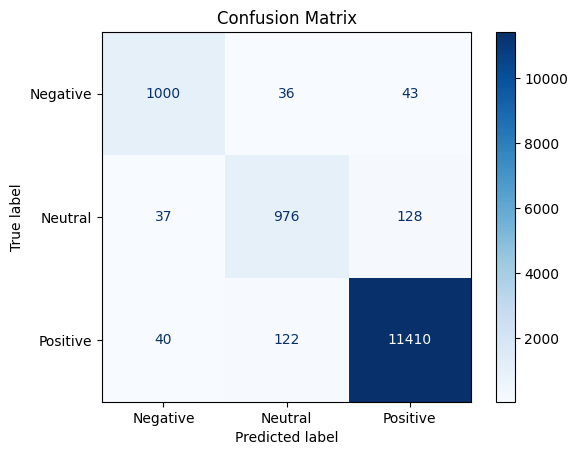

In [47]:
predictions = trainer.predict(val_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = val_labels

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()